**Career Accelerator - Project One**
**Hanoi Group - Week One**

# Business Understanding

Data Analysis is the process of inspecting, cleaning, processing and modeling data to extract meaningful information to make
decisions.This project uses a dataset about the indian start-up companies and their informations such as location,
year founded, company name, etc as well as their funding history from 2018 to 2021, To perform an exploratory data analysis 
and draw insights from useful information found

One of the great way for a good analysis work is to understand the business problem you are trying to solve.
For a better understanding of the problem, create an objective or a scenario to work around

### Aim
As an analyst of an investment company, investigate the indian startup ecosystem so that the company can make data driven
decisions about entering into the indian startup business

## Hypothesis

### Null Hpyothesis - Indian Start-ups in the technology industry are likely to recieve funding 

### Alternative Hypothesis -  indian startupsin the technology industry are not likely to receive funding 

## Questions

##### 1. what are the top five sectors where funding is maximum?
##### 2. what is the highest type of investment made?
##### 3. what is the maximum amount of funding recieved by a startup?
##### 4. what are the top five startup-sectors which are investor's favourite?
##### 5. what is the total amount of funds each year?
##### 6. In which year did a startup recieve the highest amount of funding?

# Setup

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.pyplot as plt
import seaborn as sns
import re

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv to import the data files
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2019 = pd.read_csv('startup_funding2019.csv')
data_2020 = pd.read_csv('startup_funding2020.csv')
data_2021 = pd.read_csv('startup_funding2021.csv')



# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

### Previewing Data sets and Providing Summary Information

### 2018 Dataset

In [3]:
#view the columns in the 2018 dataset
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [4]:
#preview the 2018 dataset to understand the data
data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [5]:

print(data_2018.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 



In [6]:
#check for the number of null values in the 2018 data
pd.isnull(data_2018).sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [7]:
#Viewing the first 50 rows in the 2018 data
data_2018[:50]


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...


## _From the above, we notice the following
### _-The amount columns contains different currencies as well as cells with "-"_
### _-The Industry columns is described using more than one phrase_
### _-The Location is described using more than one physical address._

### _To clean these, we will assume the Amounts without any signs are in dollars; thus convert the values in INP to USD and replace "-" with NaN

### 2019 Dataset

In [8]:
#view the first 10 rows in the 2019 data
data_2019.head(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G


In [9]:
#view the last 5 rows in the 2019 data
data_2019.tail()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
88,Ess Kay Fincorp,NaN,Rajasthan,Banking,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India","$33,000,000",NaN


In [10]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [11]:
pd.isnull(data_2019).sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

### 2020 Dataset

In [12]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


### 2021 Dataset

In [13]:
print(data_2021.info(),'\n')
data_2021

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


###  Observations from previewing the datasets
**The 2018 DataFrame**
- The columns in 2018 are different from those of 2019 - 2021, meaning they have to be renamed for concatenation.
- The amounts in the 2018 DataFrame are a mix of Indian Rupees (INR) and US Dollars (USD), meaning they have to be converted into same currency.
- The industry and location columns have multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**The 2019 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.
- The headquarter column has multiple information. A decision is to be made between selecting the first value before the separator(,) as the main value, or representing that column with a wordcloud.

**The 2020 DataFrame**
- There is an extra column called "Unnamed:9", giving it a total of 10 columns. It should be dropped to ensure complete alignment with the other DataFrames for ease of concatenation.

**The 2021 DataFrame**
- The datatype of the "Founded" column is set to float64. It should be set to a string for uniformity.
- There are some cells that have null values, "Amount" has 3 null cells

**General Observations**
- The currency signs and commas have to be removed from each of amount column for each DataFrame.

### Assumptions

- The 2022 average INR/USD rate will be used to convert the Indian Rupee values to US Dollars in the 2018 DataFrame.
- First values of industry and location in the 2018 data will be selected as the primary sector and headquarters respectively.
- Amounts without currency symbols are assumed to be in USD ($)
- Financial analysis will be narrowed to transactions whose amounts are available in the loaded data.

### Correcting Errors observed From Exploring The Various Datasets

### Correcting errors in 2018 datsets

In [14]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [15]:
#Cast the 'Industry' collumn to a string 
data_2018['Industry'] = data_2018['Industry'].apply(str)

#Split the multiple information and only retainthe first part
data_2018['Industry'] = data_2018['Industry'].str.split(',').str[0]
data_2018['Industry'] = data_2018['Industry'].replace("'","",regex=True)


In [16]:
# Cast the data type of Location to string 
data_2018['Location'] = data_2018['Location'].apply(str)

#Split the multiple information and only retainthe first part
data_2018['Location'] = data_2018['Location'].str.split(',').str[0]
data_2018['Location'] = data_2018['Location'].replace("'","",regex = True)


In [17]:
data_2018['Amount'].value_counts()

—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: Amount, Length: 198, dtype: int64

In [18]:
#Set Ammount column to string data type
data_2018['Amount'] = data_2018['Amount'].apply(str)

#Replace the comma separator with an empty string 
data_2018['Amount'] = data_2018['Amount'].replace(",","",regex = True)

#Replace the '-' with a 0 
data_2018['Amount'] = data_2018['Amount'].replace("—",0)

#Replace the $ with an empty string 
data_2018['Amount'] = data_2018['Amount'].replace("$","")
data_2018


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...


In [19]:
#Create a new column 'INR_Amount' and fill with second part from the string spliting 
data_2018['INR_Amount'] = data_2018['Amount'].str.rsplit('₹',n =2).str[1]

#fill null values with 0 in the new coolumn 
data_2018['INR_Amount'] = data_2018['INR_Amount'].apply(float).fillna(0)

#Convert the INR to USD and fill in a new column USD_Amount
data_2018['USD_Amount'] = data_2018['INR_Amount']*0.01208

#Replace 0 with nan in the new USD_Amount
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace(0,np.nan)

#Replace the null cells with values that were originally in dollars from the initial column 
data_2018['USD_Amount'] = data_2018['USD_Amount'].fillna(data_2018['Amount'])

data_2018['USD_Amount']

0         250000
1       483200.0
2       785200.0
3        2000000
4              0
         ...    
521    225000000
522            0
523         7500
524     422800.0
525     35000000
Name: USD_Amount, Length: 526, dtype: object

In [20]:
data_2018['USD_Amount'].value_counts()

0           148
1000000      24
500000       13
2000000      12
604000.0      9
           ... 
2200000       1
1200000       1
$15000        1
$1041000      1
35000000      1
Name: USD_Amount, Length: 198, dtype: int64

In [21]:
#Set USD_Amount datatype to string 
data_2018['USD_Amount'] = data_2018['USD_Amount'].apply(str)

#Replace the $ with an empty string 
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace('$','',regex = True)



In [22]:
data_2018['USD_Amount'] = data_2018['USD_Amount'].apply(lambda x: float(str(x).replace("$","")))
data_2018['USD_Amount'].value_counts()

0.0          148
1000000.0     27
2000000.0     15
500000.0      13
5000000.0      9
            ... 
1800000.0      1
2200000.0      1
1200000.0      1
15000.0        1
7500.0         1
Name: USD_Amount, Length: 180, dtype: int64

In [23]:
data_2018['USD_Amount'] = data_2018['USD_Amount'].replace(0,np.nan)
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,INR_Amount,USD_Amount
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000.0
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,483200.0
2,MyLoanCare,Credit,Series A,₹65000000,Gurgaon,Leading Online Loans Marketplace in India,65000000.0,785200.0
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,NaN
...,...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",0.0,225000000.0
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,0.0,NaN
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,0.0,7500.0
524,Droni Tech,Information Technology,Seed,₹35000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,35000000.0,422800.0


In [24]:
#Drop the two columns INR_Amount and Amount
data_2018.drop(columns= ['INR_Amount','Amount'], inplace = True)


#Rename the USD_Ammount to Amount
data_2018.rename(columns = {'USD_Amount':'Amount'}, inplace = True)
data_2018

,Company Name,Industry,Round/Series,Location,About Company,Amount
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN
...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0


In [25]:
#Add a column to indicate the year of funding as 2018
data_2018['Year_of_Funding'] = '2018'
data_2018

,Company Name,Industry,Round/Series,Location,About Company,Amount,Year_of_Funding
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,Bangalore,"Udaan is a B2B trade platform, designed specif...",225000000.0,2018
522,Happyeasygo Group,Tourism,Series A,Haryana,HappyEasyGo is an online travel domain.,NaN,2018
523,Mombay,Food and Beverage,Seed,Mumbai,Mombay is a unique opportunity for housewives ...,7500.0,2018
524,Droni Tech,Information Technology,Seed,Mumbai,Droni Tech manufacture UAVs and develop softwa...,422800.0,2018


### Correcting errors in the 2019 Dataframe

In [26]:
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [27]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [28]:
#Set the datatype for the 'Founded' to string
data_2019['Founded'] = data_2019['Founded'].apply(str)

In [29]:
#Set the datatypr of Column Amount to string
data_2019['Amount($)'] = data_2019['Amount($)'].apply(str)

#Replace the comma separator with an empty string 
data_2019['Amount($)'] = data_2019['Amount($)'].replace(",","",regex=True)

#Replace the 'Undisclosed' with nan
data_2019['Amount($)'] = data_2019['Amount($)'].replace("Undisclosed",np.nan,regex = True)
data_2019[:21]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,$6300000,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,$150000000,Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",$28000000,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",$30000000,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),$6000000,NaN
5,FlytBase,nan,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN
6,Finly,nan,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",$1000000,Pre series A
8,Quantiphi,nan,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,$20000000,Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,$275000000,Series G


In [30]:
#replace the $ with an empty string and save the output as a float
data_2019['Amount($)'] = data_2019['Amount($)'].apply(lambda x: float(str(x).replace("$","")))
data_2019[:21]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN
5,FlytBase,nan,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN
6,Finly,nan,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A
8,Quantiphi,nan,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,20000000.0,Series A
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G


In [31]:
#Create a new column to show the year of funding 
data_2019['Year_of_Funding'] = '2019'
data_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Bombay Shaving,nan,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C,2019
2,Eduisfun,nan,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,NaN,2019
...,...,...,...,...,...,...,...,...,...,...
84,Infra.Market,nan,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000.0,Series A,2019
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN,2019
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000.0,Series B,2019
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000.0,NaN,2019


### Correcting Errors in the 2020 Dataframe

In [32]:
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN,NaN
1051,EpiFi,NaN,NaN,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round,NaN
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C,NaN


In [33]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


In [34]:
#dropping the extra column in the 2020 Dataframe
data_2020.drop(columns = ['Unnamed: 9'],inplace = True)

In [35]:
#Convert headquarter column to string datatype
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].apply(str)

#Split the multiple info and retain the first part
#delete the 
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].str.split(',').str[0]

data_2020['HeadQuarter'] = data_2020['HeadQuarter'].replace("'","",regex= True)
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures","$1,500,000",NaN
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital","$13,200,000",Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,"$8,000,000",NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,"$8,043,000",Series C


In [36]:
#Set the Amount column to string datatype
data_2020['Amount($)'] = data_2020['Amount($)'].apply(str)

#replace the separators with empty string 
data_2020['Amount($)'] = data_2020['Amount($)'].replace(",","",regex = True)

#Replace 'Undisclosed' with nan
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undisclosed",np.nan,regex = True)

data_2020['Amount($)'] = data_2020['Amount($)'].replace("nan",np.nan, regex = True)

In [37]:
data_2020.loc[data_2020['Company/Brand']=="True Balance","Stage"] 

136         NaN
465    Series C
Name: Stage, dtype: object

In [38]:
data_2020.loc[data_2020['Company/Brand']=="True Balance","Stage"] = "Series C"

In [39]:
data_2020[130:137]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
130,Instoried,2018,Bangalore,AI startup,Instoried is an augmented writing platform whi...,"Sharmin Ali, Sutanshu Raj","Venture Catalysts, SOSV",$1000000,Pre-series A
131,PlayerzPot,2015,Mumbai,Gaming startup,"Favorite fantasy cricket, football & kabaddi l...","Yogesh, Mitesh Gangar",NaN,$3000000,Series A
132,Instamojo,2012,Bangalore,FinTech,Instamojo is an on-demand payments platform th...,"Aditya Sengupta, Akash Gehani, Harshad Sharma,...","BASE, Gunosy Capital",NaN,NaN
133,Turtlemint,2015,Mumbai,HealthTech,Turtlemint has built Indian personalized insur...,"Anand Prabhudesai, Dhirendra Mahyavanshi, Kuna...","Nexus Venture Partners, Dream Incubator",$30000000,NaN
134,Arata,2017,New Delhi,E-commerce,Arata is an e-commerce site for beauty product...,"Dhruv Madhok, Dhruv Bhasin",DSG Consumer Partners,$1000000,Pre-series A
135,MPL,2018,Bangalore,Gaming startup,Mobile Premier League is a skill-based eSports...,"Sai Srinivas Kiran G, Shubham Malhotra","Pegasus Tech Ventures, Base Partners",$5000000,NaN
136,True Balance,2014,Gurugram,FinTech,True Balance is a digital wallet that enables ...,"Cheolwon Lee, Jay Yi, Martin Lee","IBK Capital, SB Partners",$28000000,Series C


In [40]:
data_2020.iloc[465]

Company/Brand                                         True Balance
Founded                                                       2014
HeadQuarter                                               Gurugram
Sector                                                     Finance
What it does     Earn money by meeting financial needs of your ...
Founders                                      Charlie, Jay, Martin
Investor                                               Balancehero
Amount($)                                        $887000 $23000000
Stage                                                     Series C
Name: 465, dtype: object

In [41]:
#Drop the index 465 due to multiple entry in Amount column
data_2020.drop([465], axis = 0, inplace = True)
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,$200000,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,$100000,Pre-seed
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",$400000,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",$340000,NaN
...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",$1500000,NaN
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",$13200000,Seed Round
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,$8000000,NaN
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,$8043000,Series C


In [42]:
data_2020[471:473]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",$800000000 to $850000000,NaN
473,Gradeup,2015,Noida,Education,"India's largest exam preparation destination,",Shobhit Bhatnagar,"Times Internet, TLabs",$546000,NaN


In [43]:
data_2020.loc[data_2020['Company/Brand'] =="Eruditus", ["Amount($)","Stage"]] = [113000000,"Series D"]
data_2020.loc[data_2020['Company/Brand'] =="Eruditus"]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
472,Eruditus,2010,Mumbai,Education,Bring world-class business and professional ed...,"Chaitanya Kalipatnapu, Ashwin Damera","Bertelsmann India Investments, Sequoia Capital...",113000000,Series D


In [44]:
data_2020.loc[data_2020['Amount($)'] == "Undisclosed"]
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undiclsosed",np.nan,regex= True)
data_2020['Amount($)'] = data_2020['Amount($)'].replace("Undislosed",np.nan,regex= True)


In [45]:
#Delete the $ sign from the column Amount
data_2020['Amount($)'] = data_2020['Amount($)'].apply(lambda x: float(str(x).replace("$","")))

In [46]:
#Add the new column to show the year of funding 
data_2020['Year_of_Funding'] = '2020'
data_2020

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,NaN,2020
1051,EpiFi,NaN,nan,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,NaN,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


## Correcting Errors in 2021 data

In [47]:
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [48]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [49]:
#Seet the column 'Founded'  datatype to string 
data_2021['Founded'] = data_2021['Founded'].apply(str)

In [50]:
#Set Amount column datatype to string
data_2021['Amount($)'] = data_2021['Amount($)'].apply(str)

#replace 'undisclosed' with nan
data_2021['Amount($)'] = data_2021['Amount($)'].replace("Undisclosed",np.nan,regex = True)

data_2021['Amount($)'] = data_2021['Amount($)'].replace("nan",np.nan, regex = True)
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [51]:
#Split the string and pick the string after $ sign 
data_2021['Amount($)'] = data_2021['Amount($)'].str.rsplit('$',n =2).str[1]
data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B


In [52]:
#Add new column to show the year of funding 
data_2021['Year_of_Funding']='2021'

In [53]:

data_2021['Amount($)'] = data_2021['Amount($)'].apply(str)

#Delete the comma separator and replace with empty string 
data_2021['Amount($)'] = data_2021['Amount($)'].replace(",","",regex = True)

#Delete the '-' and replace with 0
data_2021['Amount($)'] = data_2021['Amount($)'].replace("—",0)

#Delete the $ and replace with empty string 
data_2021['Amount($)'] = data_2021['Amount($)'].replace("$","")


In [54]:
#Add the new column to show the year of funding 
data_2021['Founded'] = data_2021['Founded'].apply(str)

data_2021

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year_of_Funding
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,NaN,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000,Pre-series A,2021
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000,Series D,2021
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000,Series C,2021
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000,Series B,2021


### View the columns in each dataset

In [55]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Location', 'About Company',
       'Amount', 'Year_of_Funding'],
      dtype='object')

In [56]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year_of_Funding'],
      dtype='object')

In [57]:
data_2020.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year_of_Funding'],
      dtype='object')

In [58]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Location', 'About Company',
       'Amount', 'Year_of_Funding'],
      dtype='object')

## Modify the column headers in the 2018 dataset to match the other datasets

In [59]:
#remane column header
data_2018.rename(columns = {'Company Name':'Company/Brand','Industry':'Sector','Location':'HeadQuarter',
                               'About Company':'What it does','Amount':'Amount($)','Round/Series':'Stage'}, inplace = True)

In [60]:
#Joining all the four files using concatenate
data = pd.concat([data_2018,data_2019,data_2020,data_2021])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company/Brand    2878 non-null   object
 1   Sector           2860 non-null   object
 2   Stage            1942 non-null   object
 3   HeadQuarter      2858 non-null   object
 4   What it does     2878 non-null   object
 5   Amount($)        2470 non-null   object
 6   Year_of_Funding  2878 non-null   object
 7   Founded          2140 non-null   object
 8   Founders         2333 non-null   object
 9   Investor         2252 non-null   object
dtypes: object(10)
memory usage: 247.3+ KB


In [61]:
data.head(10)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",250000.0,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,483200.0,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,785200.0,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,2000000.0,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,NaN,2018,NaN,NaN,NaN
5,Hasura,Cloud Infrastructure,Seed,Bengaluru,Hasura is a platform that allows developers to...,1600000.0,2018,NaN,NaN,NaN
6,Tripshelf,Internet,Seed,Kalkaji,Tripshelf is an online market place for holida...,193280.0,2018,NaN,NaN,NaN
7,Hyperdata.IO,Market Research,Angel,Hyderabad,Hyperdata combines advanced machine learning w...,604000.0,2018,NaN,NaN,NaN
8,Freightwalla,Information Services,Seed,Mumbai,Freightwalla is an international forwarder tha...,NaN,2018,NaN,NaN,NaN
9,Microchip Payments,Mobile Payments,Seed,Bangalore,Microchip payments is a mobile-based payment a...,NaN,2018,NaN,NaN,NaN


In [62]:
data.tail(20)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
1189,bitsCrunch,Blockchain,Seed,Chennai,A consulting firm focused mainly on Data Analy...,700000,2021,2020.0,Saravanan Jaichandaran,"Covalent, Double Peak, GenBlock Capital, Ledge..."
1190,Prolgae,Biotechnology,Seed,The Nilgiris,Prolgae Spirulina Supplies Pvt. Ltd. is a Nord...,200000,2021,2016.0,Aakas Sadasivam,Vijayan
1191,Biddano,"Health, Wellness & Fitness",Pre-series A1,Pune,India's first tech-enabled healthcare logistic...,2000000,2021,2016.0,"Talha Shaikh, Ashok Yadav","Gokul Rajaram, JPIN, Venture Catalysts UK, Ang..."
1192,Geniemode,B2B,NaN,Gurugram,Transforming global sourcing for retailers & s...,2000000,2021,2021.0,"Amit Sharma, Tanuj Gangwani",Info Edge Ventures
1193,Sapio Analytics,Computer Software,NaN,Mumbai,Sapio helps government create policies driven ...,nan,2021,2019.0,"Hardik Somani, Ashwin Srivastava, Shripal Jain...","Rachit Poddar, Rajesh Gupta"
1194,Neokred,FinTech,Seed,Bangalore,Democratizing Open Banking,500000,2021,2019.0,"Tarun Nazare, Rohith Reji","Virenxia Group, Rajesh Jain, Nitin Agarwal"
1195,Delhivery,Logistics & Supply Chain,Series I,Gurugram,Delhivery is a leading logistics and supply ch...,76000000,2021,2011.0,Sahil Barua,Addition
1196,Flipspaces,Design,Pre-series B,Mumbai,Flipspaces is a global tech-enabled venture to...,2000000,2021,2011.0,Kunal Sharma,Prashasta Seth
1197,Fleek,Internet,Seed,Bangalore,Fleek helps track & manage subscriptions in on...,1000000,2021,2021.0,"Aditya Uttaravalli, Arvind Eashwar",Axilor
1198,GoKwik,Information Technology & Services,Pre-series A,New Delhi,GoKwik is a platform for solving shopping expe...,5000000,2021,2020.0,"Ankush Talwar, Chirag Taneja, Vivek Bajpai","Matrix Partners India, Jitendra Gupta, RTP Global"


In [63]:
#Check fpr null values in the column 'Amount($)'
pd.isnull(data['Amount($)']).sum()

408

In [64]:
data['Amount($)'] = data['Amount($)'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [65]:
data['Sector'] = data['Sector'].replace("Fintech","FinTech")
data['Sector'] = data['Sector'].replace("Edtech","EdTech")

##### 1. what are the top five sectors where funding is maximum?

In [66]:
data.head(5)

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",1200000.0,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,120000000.0,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,30000000.0,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,51000000.0,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,2000000.0,2018,NaN,NaN,NaN


In [67]:
Top_sectors = data.groupby(['Sector']).sum()['Amount($)'].sort_values(ascending=False).reset_index().head(5)
Top_sectors

,Sector,Amount($)
0,FinTech,3.552366e+09
1,EdTech,3.264201e+09
2,Automotive,3.199900e+09
3,E-commerce,2.412945e+09
4,Financial Services,1.950750e+09


In [68]:
Unknown_Sector = data[data['Sector']==("—")]
Unknown_Sector

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
58,MissMalini Entertainment,—,Seed,Mumbai,MissMalini Entertainment is a multi-platform n...,2.150000e+08,2018,NaN,NaN,NaN
105,Jagaran Microfin,—,Debt Financing,Kolkata,Jagaran Microfin is a Microfinance institution...,5.500000e+06,2018,NaN,NaN,NaN
121,FLEECA,—,Seed,Jaipur,FLEECA is a Tyre Care Provider company.,1.500000e+08,2018,NaN,NaN,NaN
146,WheelsEMI,—,Series B,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI...",NaN,2018,NaN,NaN,NaN
153,Fric Bergen,—,Venture - Series Unknown,Alwar,Fric Bergen is a leader in the specialty food ...,3.800000e+06,2018,NaN,NaN,NaN
174,Deftouch,—,Seed,Bangalore,Deftouch is a mobile game development company ...,5.000000e+05,2018,NaN,NaN,NaN
181,Corefactors,—,Seed,Bangalore,"Corefactors is a leading campaign management, ...",2.250000e+08,2018,NaN,NaN,NaN
210,Cell Propulsion,—,Seed,Bangalore,Cell Propulsion is an electric mobility startu...,NaN,2018,NaN,NaN,NaN
230,Flathalt,—,Angel,Gurgaon,FInd your Customized Home here.,3.200000e+07,2018,NaN,NaN,NaN
235,dishq,—,Seed,Bengaluru,dishq leverages food science and machine learn...,2.000000e+05,2018,NaN,NaN,NaN


In [69]:
#drop the rows with'—' in the Sectors columns
data_New=data.drop(data[data['Sector']=='—'].index)
data_New

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",1200000.0,2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,Mumbai,A startup which aggregates milk from dairy far...,120000000.0,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,Gurgaon,Leading Online Loans Marketplace in India,30000000.0,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,Noida,PayMe India is an innovative FinTech organizat...,51000000.0,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,Hyderabad,Eunimart is a one stop solution for merchants ...,2000000.0,2018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,Gurugram,A gig/on-demand staffing company.,3000000.0,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
1205,Vahdam,Food & Beverages,Series D,New Delhi,VAHDAM is among the world’s first vertically i...,20000000.0,2021,2015.0,Bala Sarda,IIFL AMC
1206,Leap Finance,Financial Services,Series C,Bangalore,International education loans for high potenti...,55000000.0,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
1207,CollegeDekho,EdTech,Series B,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",26000000.0,2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [70]:
#Q1.
Top_sectors = data_New.groupby(['Sector']).sum()['Amount($)'].sort_values(ascending=False).reset_index().head(5)
Top_sectors

,Sector,Amount($)
0,FinTech,3.333236e+09
1,EdTech,3.225901e+09
2,Automotive,3.199900e+09
3,E-commerce,2.412225e+09
4,Financial Services,1.949750e+09


Text(0, 0.5, 'Amount Received (Billion USD)')

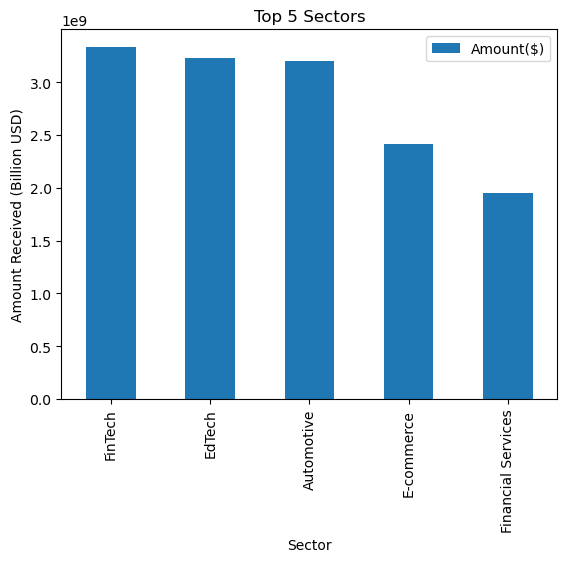

In [71]:
T5_Sectors=Top_sectors.plot.bar(x = 'Sector', y = 'Amount($)')
plt.title('Top 5 Sectors')
plt.ylabel('Amount Received (Billion USD)')

## Q2. What is the highest type of investment made?

In [72]:
Top_Investment = data.groupby(['Stage']).count()['Company/Brand'].sort_values(ascending=False).head()
Top_Investment

Stage
Seed            606
Series A        305
Pre-series A    211
Series B        134
Series C        114
Name: Company/Brand, dtype: int64

Text(0, 0.5, 'No. of Companies funded')

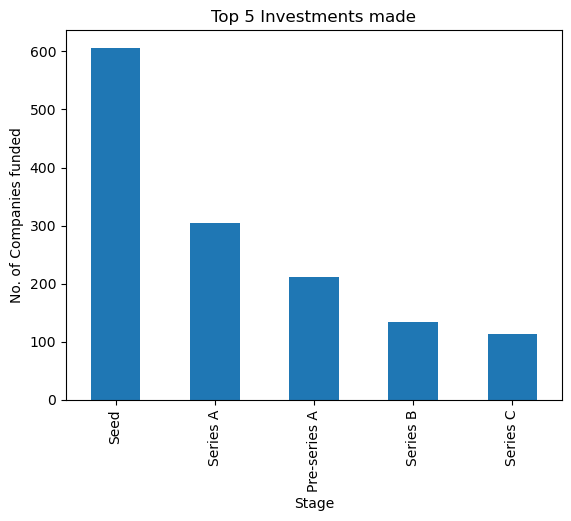

In [73]:
T5_Investment =Top_Investment.plot.bar()
plt.title('Top 5 Investments made')
plt.ylabel('No. of Companies funded')

## 3. what is the maximum amount of funding recieved by a startup?

In [74]:
Top_Companies = data_New.groupby(['Company/Brand']).max()['Amount($)'].sort_values(ascending=False).head(10)
Top_Companies

C:\Users\lakit\AppData\Local\Temp\ipykernel_16124\951268416.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  Top_Companies = data_New.groupby(['Company/Brand']).max()['Amount($)'].sort_values(ascending=False).head(10)


Company/Brand
Byju              840000000.0
Dream Sports      840000000.0
Swiggy            800000000.0
ONGO Framework    800000000.0
eJOHRI            800000000.0
The ePlane        800000000.0
Data Sutram       660000000.0
OYO               660000000.0
Zetwerk           600000000.0
Samosa Singh      600000000.0
Name: Amount($), dtype: float64

Text(0.5, 1.0, 'Highest Funded Startups')

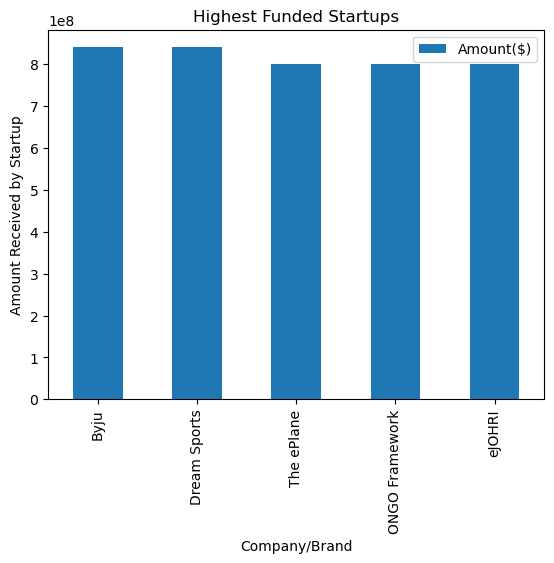

In [75]:
Top_C = data_New.sort_values(by='Amount($)', ascending = False).head(5)
Top_C.plot.bar(x='Company/Brand')
plt.show
plt.ylabel('Amount Received by Startup')
plt.title('Highest Funded Startups')

In [76]:

maxClm = data['Amount($)'].max()
 
print("Maximum Amount of funding received by a startup is : ")
print(maxClm)

Maximum Amount of funding received by a startup is : 
1000000000.0


## 4. what are the top five startups which are investor's favourite?

In [77]:
#Q4 .Top 10 Sectors to receive funds 
Top_sectors = data.groupby(['Sector']).count()['Company/Brand'].sort_values(ascending=False).reset_index().head(10)
Top_sectors

,Sector,Company/Brand
0,FinTech,260
1,EdTech,222
2,Financial Services,88
3,E-commerce,73
4,Automotive,54
5,AgriTech,43
6,Food & Beverages,39
7,Logistics,37
8,Healthcare,36
9,Gaming,36


Text(0.5, 0, 'No of Companies Funded')

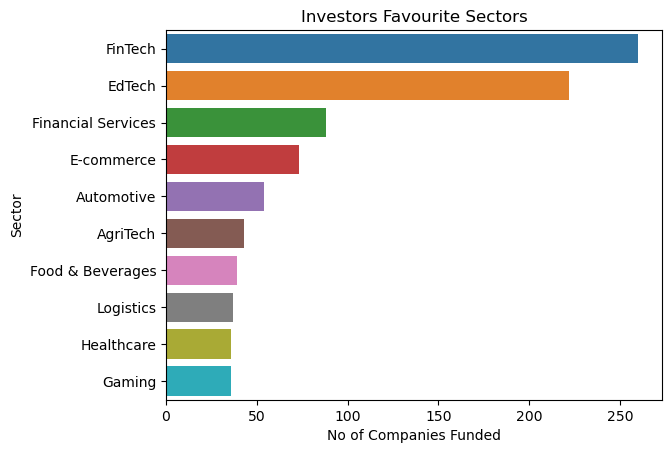

In [78]:
#plot the graph of top sectors to receive funding 
sns.barplot(x = 'Company/Brand', y = 'Sector', data = Top_sectors)
plt.title('Investors Favourite Sectors')
plt.xlabel('No of Companies Funded')

## 5. what is the total amount of funds each year?

In [79]:
Funding_by_year = data.groupby(['Year_of_Funding']).sum()['Amount($)'].reset_index().head(5)
Funding_by_year

,Year_of_Funding,Amount($)
0,2018,1.106591e+10
1,2019,1.414016e+09
2,2020,2.468589e+10
3,2021,2.766576e+10


Text(0.5, 1.0, 'Total Amount of Funding by Year')

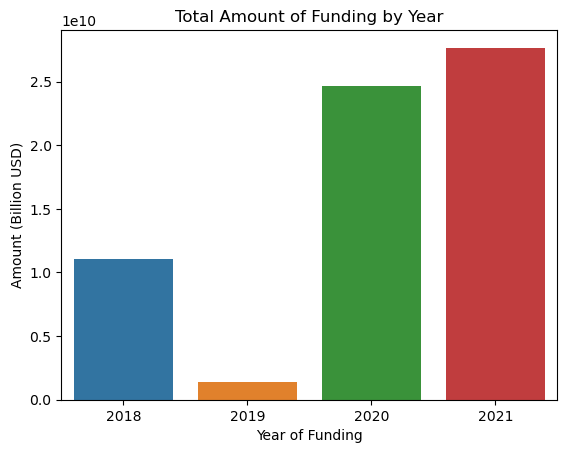

In [80]:
sns.barplot(x = 'Year_of_Funding', y = 'Amount($)', data = Funding_by_year)
plt.ylabel('Amount (Billion USD)')
plt.xlabel('Year of Funding')
plt.title('Total Amount of Funding by Year')

## 6. In which year did a startup recieve the highest amount of funding?

In [81]:
Top_C

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year_of_Funding,Founded,Founders,Investor
935,Byju,EdTech,NaN,nan,Provides online learning classes,840000000.0,2020,2011,Byju Raveendran,General Atlantic
935,Dream Sports,Sports,NaN,Mumbai,Dream Sports is India’s leading sports technol...,840000000.0,2021,2008.0,Harsh Jain,"Falcon Edge, DST Global, D1 Capital, Redbird C..."
53,The ePlane,Aero company,Seed,Chennai,Transforming the mobility landscape using aeri...,800000000.0,2020,2016,"Satya Chakravarthy, Pranjal Mehta",Speciale Invest
53,ONGO Framework,B2B,Angel,Hyderabad,ONGO Framework is a B2B IT and digital solutio...,800000000.0,2018,NaN,NaN,NaN
53,eJOHRI,Jewellery,Pre series A,Mumbai,Omnichannel marketplace for gems and jewellery,800000000.0,2019,2015.0,"Jignesh Mehta, Shailen Mehta",Rajesh Ranavat


*_The start up with the highest funding was Byju, in the EdTech Sector, funded in the year 2020_*

### We notice the Top sectors that are favourite to investors are in FinTech and EdTech
### The highest Amount received by a start-up are also in the FinTech and EdTech sectors
### The startup with the highest amount of funding is also in the Edtech industry.

## From the above analysis, the Null hypothesis is correct: Indian Start-ups in the Technology industry are likely to receive funding from investors